<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Clustering is your friend 

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly` 

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well. 


### Start small grow big 

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach. 

## Deliverable 📬

To complete this project, your team should: 

* Have a map with hot-zones using any python library (`plotly` or anything else). 
* You should **at least** describe hot-zones per day of week. 
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan. 

Your maps should look something like this: 

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map" />

### Working on the project with DBSCAN clustering algorithm

##### Installing Plotly

In [1]:
!pip install plotly

##### Importing adequate librairies

In [2]:
import pandas as pd 
import numpy as np 

from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe_connected"

##### Loading the dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv")

##### Understanding the overall structure of the dataset

In [4]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
print ("The dataset contains {} observations".format(df.shape[0]))

The dataset contains 564516 observations


In [6]:
print ("The dataset contains {} columns".format(df.shape[1]))

The dataset contains 4 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


##### Take a sample of 100 000 observations from the dataset

In [8]:
dataset = df.sample(100000)
dataset.head()

,Date/Time,Lat,Lon,Base
320963,4/30/2014 8:07:00,40.7347,-73.9988,B02617
507958,4/25/2014 17:43:00,40.7451,-73.9827,B02682
537507,4/29/2014 16:57:00,40.7449,-73.9888,B02682
316544,4/29/2014 7:37:00,40.7487,-74.0035,B02617
429852,4/14/2014 13:11:00,40.7827,-73.9473,B02682


##### Converting "Date/Time" column to datetime format

In [9]:
dataset["Date/Time"] = pd.to_datetime(dataset["Date/Time"])

##### Verifying that the dataframe does not contain any missing values

In [10]:
dataset.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 320963 to 458489
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  100000 non-null  datetime64[ns]
 1   Lat        100000 non-null  float64       
 2   Lon        100000 non-null  float64       
 3   Base       100000 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.8+ MB


In [12]:
sample_data = dataset

##### Basic feature engineering from after conversion of "Date/Time" column to datetime format

In [13]:
sample_data["Year"] = sample_data["Date/Time"].dt.year
sample_data["Month"] = sample_data["Date/Time"].dt.month
sample_data["Day"] = sample_data["Date/Time"].dt.day
sample_data["Hour"] = sample_data["Date/Time"].dt.hour
sample_data["Minutes"] = sample_data["Date/Time"].dt.minute
sample_data["DayOfWeek"] = sample_data["Date/Time"].dt.day_name()

In [14]:
sample_data.head(3)

,Date/Time,Lat,Lon,Base,Year,Month,Day,Hour,Minutes,DayOfWeek
320963,2014-04-30 08:07:00,40.7347,-73.9988,B02617,2014,4,30,8,7,Wednesday
507958,2014-04-25 17:43:00,40.7451,-73.9827,B02682,2014,4,25,17,43,Friday
537507,2014-04-29 16:57:00,40.7449,-73.9888,B02682,2014,4,29,16,57,Tuesday


##### Dropping "Date/Time" and "Base" column before further processing

In [15]:
sample_data = sample_data.drop(columns=["Date/Time", "Base"])

In [16]:
sample_data.head()

,Lat,Lon,Year,Month,Day,Hour,Minutes,DayOfWeek
320963,40.7347,-73.9988,2014,4,30,8,7,Wednesday
507958,40.7451,-73.9827,2014,4,25,17,43,Friday
537507,40.7449,-73.9888,2014,4,29,16,57,Tuesday
316544,40.7487,-74.0035,2014,4,29,7,37,Tuesday
429852,40.7827,-73.9473,2014,4,14,13,11,Monday


In [17]:
sample_data.shape

(100000, 8)

##### Verifying that "DayOfWeek" column contains all the 7 days of the week

In [18]:
sample_data["DayOfWeek"].unique()

array(['Wednesday', 'Friday', 'Tuesday', 'Monday', 'Thursday', 'Sunday',
       'Saturday'], dtype=object)

##### Verifying that "Day" column contains all the 30 days of April

In [19]:
sample_data["Day"].unique()

array([30, 25, 29, 14, 11, 15, 10, 27, 24,  5,  6,  3,  1,  8, 18, 28, 20,
        7, 21,  4, 26,  9,  2, 12, 17, 19, 16, 22, 13, 23])

In [20]:
len(sample_data["Day"].unique())

30

##### Verifying the values in the "Hour" column

In [21]:
sample_data["Hour"].unique()

array([ 8, 17, 16,  7, 13, 11, 19, 20, 10, 18,  9, 15,  2, 14,  3, 21,  5,
       22,  4,  6, 12,  1, 23,  0])

In [22]:
len(sample_data["Hour"].unique())

24

##### Creating dataframes for information concerning each of the seven days of the week for April

In [23]:
monday = sample_data[sample_data.DayOfWeek == "Monday"]

In [24]:
tuesday = sample_data[sample_data.DayOfWeek == "Tuesday"]

In [25]:
wednesday = sample_data[sample_data.DayOfWeek == "Wednesday"]

In [26]:
thursday = sample_data[sample_data.DayOfWeek == "Thursday"]

In [27]:
friday = sample_data[sample_data.DayOfWeek == "Friday"]

In [28]:
saturday = sample_data[sample_data.DayOfWeek == "Saturday"]

In [29]:
sunday = sample_data[sample_data.DayOfWeek == "Sunday"]

##### Verifying that the number of rows of each of the dataframes add up to the total number of rows of the original dataset

In [30]:
monday.shape[0]+tuesday.shape[0]+wednesday.shape[0]+thursday.shape[0]+friday.shape[0]+saturday.shape[0]+sunday.shape[0]

100000

##### Creating dataframes for information concerning each of the 24 hours of the day

In [31]:
midnight = sample_data[sample_data.Hour == 0]

In [32]:
one = sample_data[sample_data.Hour == 1]

In [33]:
two = sample_data[sample_data.Hour == 2]

In [34]:
three = sample_data[sample_data.Hour == 3]

In [35]:
four = sample_data[sample_data.Hour == 4]

In [36]:
five = sample_data[sample_data.Hour == 5]

In [37]:
six = sample_data[sample_data.Hour == 6]

In [38]:
seven = sample_data[sample_data.Hour == 7]

In [39]:
eight = sample_data[sample_data.Hour == 8]

In [40]:
nine = sample_data[sample_data.Hour == 9]

In [41]:
ten = sample_data[sample_data.Hour == 10]

In [42]:
eleven = sample_data[sample_data.Hour == 11]

In [43]:
twelve = sample_data[sample_data.Hour == 12]

In [44]:
thirteen = sample_data[sample_data.Hour == 13]

In [45]:
fourteen = sample_data[sample_data.Hour == 14]

In [46]:
fifteen = sample_data[sample_data.Hour == 15]

In [47]:
sixteen = sample_data[sample_data.Hour == 16]

In [48]:
seventeen = sample_data[sample_data.Hour == 17]

In [49]:
eighteen = sample_data[sample_data.Hour == 18]

In [50]:
nineteen = sample_data[sample_data.Hour == 19]

In [51]:
twenty = sample_data[sample_data.Hour == 20]

In [52]:
twenty_one = sample_data[sample_data.Hour == 21]

In [53]:
twenty_two = sample_data[sample_data.Hour == 22]

In [54]:
twenty_three = sample_data[sample_data.Hour == 23]

##### Verifying that the number of rows of each of the dataframes add up to the total number of rows of the original dataset

In [55]:
one.shape[0]+two.shape[0]+three.shape[0]+four.shape[0]+five.shape[0]+six.shape[0]+seven.shape[0]+eight.shape[0]+nine.shape[0]+ten.shape[0]+eleven.shape[0]+twelve.shape[0]+thirteen.shape[0]+fourteen.shape[0]+fifteen.shape[0]+sixteen.shape[0]+seventeen.shape[0]+eighteen.shape[0]+nineteen.shape[0]+twenty.shape[0]+twenty_one.shape[0]+twenty_two.shape[0]+twenty_three.shape[0]+midnight.shape[0]

100000

### Picking one day at a given hour, as asked in the exercise, for a test

In [56]:
sunday_noon = sunday[sunday.Hour == 12]
sunday_noon.head()

,Lat,Lon,Year,Month,Day,Hour,Minutes,DayOfWeek
524162,40.7704,-73.8651,2014,4,27,12,48,Sunday
264956,40.7107,-74.0911,2014,4,13,12,4,Sunday
265050,40.7304,-73.9950,2014,4,13,12,43,Sunday
138151,40.7098,-74.0154,2014,4,20,12,4,Sunday
311767,40.7156,-74.0111,2014,4,27,12,25,Sunday


In [57]:
sunday_noon.shape

(461, 8)

##### Dropping unnecessary columns of the dataset

In [58]:
sunday_noon = sunday_noon.drop(columns=["Year", "Month", "Day"])

In [59]:
sunday_noon.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
524162,40.7704,-73.8651,12,48,Sunday
264956,40.7107,-74.0911,12,4,Sunday
265050,40.7304,-73.9950,12,43,Sunday
138151,40.7098,-74.0154,12,4,Sunday
311767,40.7156,-74.0111,12,25,Sunday


##### A scatterplot to show how the pick-up points are scattered in New York city on Sundays between noon and 12 h 59

In [60]:
fig_sunday_noon = px.scatter_mapbox(
        sunday_noon, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_sunday_noon.show()

##### Scaling numerical data and one-hot encoding categorical data

In [61]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(sunday_noon.head())
scaled_X_sunday_noon = preprocessor.fit_transform(sunday_noon)
print('...Completed.')
print(scaled_X_sunday_noon[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
524162  40.7704 -73.8651    12       48    Sunday
264956  40.7107 -74.0911    12        4    Sunday
265050  40.7304 -73.9950    12       43    Sunday
138151  40.7098 -74.0154    12        4    Sunday
311767  40.7156 -74.0111    12       25    Sunday
...Completed.
[[ 0.82692566  2.07065564  0.          1.08389796]
 [-0.67373372 -2.07917149  0.         -1.43279003]
 [-0.17854126 -0.31457686  0.          0.79791069]
 [-0.69635673 -0.68916303  0.         -1.43279003]
 [-0.55056403 -0.61020614  0.         -0.23164349]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [62]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.001, 3, 100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_sunday_noon.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_sunday_noon)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

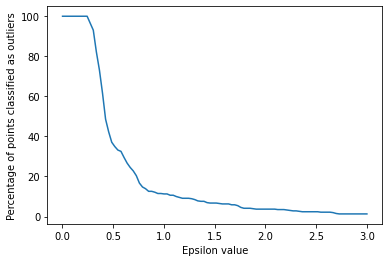

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.001, 3, 100),y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Following the litterature on DBSCAN, min_samples should be two times the number of dimensions

In [64]:
min_samples = (2*sunday_noon.shape[1])
min_samples

10

##### Retraining a DBSCAN model with epsilon value = 0.6, based on the plot created above, and min_samples = 8

In [65]:
eps = 0.6
min_samples = 8
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_sunday_noon)

DBSCAN(algorithm='brute', eps=0.6, metric='manhattan', min_samples=8)

In [66]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1]), array([137, 315,   9]))

In [67]:
sunday_noon["cluster"] = dbscan.labels_
sunday_noon.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
524162,40.7704,-73.8651,12,48,Sunday,-1
264956,40.7107,-74.0911,12,4,Sunday,-1
265050,40.7304,-73.9950,12,43,Sunday,0
138151,40.7098,-74.0154,12,4,Sunday,0
311767,40.7156,-74.0111,12,25,Sunday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points in New York city, except outliers on Sundays from noon to 12 h 59

In [68]:
fig_sunday_noon_cluster = px.scatter_mapbox(
        sunday_noon[sunday_noon.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_sunday_noon_cluster.show()

### Picking Sunday to observe how the clustering algorithm behaves

In [69]:
sunday.shape

(8919, 8)

In [70]:
fig_sunday = px.scatter_mapbox(
        sunday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_sunday.show()

##### Dropping unnecessary columns of the dataset

In [71]:
sunday = sunday.drop(columns=["Year", "Month", "Day"])

In [72]:
sunday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
311452,40.7473,-73.9722,9,45,Sunday
188045,40.7396,-73.9927,13,23,Sunday
371454,40.7381,-74.0094,2,50,Sunday
287702,40.7244,-73.9998,16,56,Sunday
556733,40.7638,-73.9756,21,43,Sunday


##### Scaling numerical data and one-hot encoding categorical data

In [73]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(sunday.head())
scaled_X_sunday = preprocessor.fit_transform(sunday)
print('...Completed.')
print(scaled_X_sunday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
311452  40.7473 -73.9722     9       45    Sunday
188045  40.7396 -73.9927    13       23    Sunday
371454  40.7381 -74.0094     2       50    Sunday
287702  40.7244 -73.9998    16       56    Sunday
556733  40.7638 -73.9756    21       43    Sunday
...Completed.
[[ 0.3429522  -0.02960783 -0.43520565  0.9268784 ]
 [ 0.1552193  -0.35556205  0.142177   -0.33653042]
 [ 0.11864796 -0.62109549 -1.44562528  1.21401677]
 [-0.21537033 -0.46845351  0.57521398  1.55858281]
 [ 0.74523699 -0.08366853  1.29694229  0.81202306]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [74]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_sunday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_sunday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

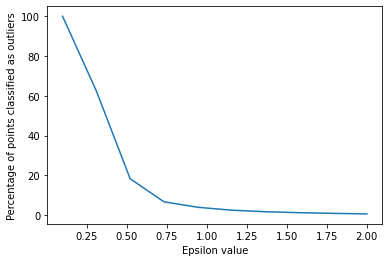

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.75, based on the plot created above, and min_samples = 6

In [76]:
eps = 0.75
min_samples = 6

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_sunday)

DBSCAN(algorithm='brute', eps=0.75, metric='manhattan', min_samples=6)

In [77]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]), array([ 499, 7975,  349,    9,   80,    7]))

In [78]:
sunday["cluster"] = dbscan.labels_
sunday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
311452,40.7473,-73.9722,9,45,Sunday,0
188045,40.7396,-73.9927,13,23,Sunday,0
371454,40.7381,-74.0094,2,50,Sunday,0
287702,40.7244,-73.9998,16,56,Sunday,0
556733,40.7638,-73.9756,21,43,Sunday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Sundays

In [79]:
fig_sunday_cluster = px.scatter_mapbox(
        sunday[sunday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_sunday_cluster.show()

### Picking Monday to observe how the clustering algorithm behaves

In [80]:
monday.shape

(10859, 8)

In [81]:
fig_monday = px.scatter_mapbox(
        monday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_monday.show()

##### Dropping unnecessary columns of the dataset

In [82]:
monday = monday.drop(columns=["Year", "Month", "Day"])

In [83]:
monday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
429852,40.7827,-73.9473,13,11,Monday
195035,40.7746,-73.9622,17,46,Monday
69403,40.7606,-73.9757,18,28,Monday
474746,40.8150,-73.9601,5,25,Monday
268326,40.7519,-73.9781,19,8,Monday


##### Scaling numerical data and one-hot encoding categorical data

In [84]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(monday.head())
scaled_X_monday = preprocessor.fit_transform(monday)
print('...Completed.')
print(scaled_X_monday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
429852  40.7827 -73.9473    13       11    Monday
195035  40.7746 -73.9622    17       46    Monday
69403   40.7606 -73.9757    18       28    Monday
474746  40.8150 -73.9601     5       25    Monday
268326  40.7519 -73.9781    19        8    Monday
...Completed.
[[ 1.14306136  0.48528501 -0.17807456 -1.07931069]
 [ 0.92451745  0.21111823  0.55494729  0.95118181]
 [ 0.54678725 -0.03728791  0.73820275 -0.09307147]
 [ 2.0145389   0.24975919 -1.64411825 -0.26711369]
 [ 0.3120549  -0.081449    0.92145821 -1.2533529 ]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [85]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_monday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_monday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

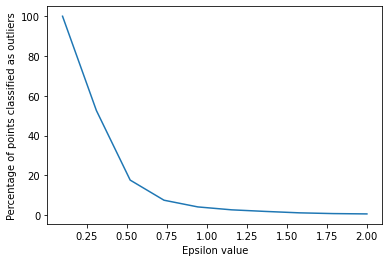

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.5, based on the plot created above, and min_samples = 8

In [87]:
eps = 0.5
min_samples = 8

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_monday)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8)

In [88]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([2066, 8213,   47,  203,  195,   31,    9,    8,   24,    8,    9,
           8,    2,   10,    8,   10,    8]))

In [89]:
monday["cluster"] = dbscan.labels_
monday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
429852,40.7827,-73.9473,13,11,Monday,0
195035,40.7746,-73.9622,17,46,Monday,0
69403,40.7606,-73.9757,18,28,Monday,0
474746,40.8150,-73.9601,5,25,Monday,-1
268326,40.7519,-73.9781,19,8,Monday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Mondays

In [90]:
fig_monday_cluster = px.scatter_mapbox(
        monday[monday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_monday_cluster.show()

### Picking Tuesday to observe how the clustering algorithm behaves

In [91]:
tuesday.shape

(16268, 8)

In [92]:
fig_tuesday = px.scatter_mapbox(
        tuesday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)
fig_tuesday.show()

##### Dropping unnecessary columns of the dataset

In [93]:
tuesday = tuesday.drop(columns=["Year", "Month", "Day"])

In [94]:
tuesday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
537507,40.7449,-73.9888,16,57,Tuesday
316544,40.7487,-74.0035,7,37,Tuesday
438761,40.7210,-74.0006,19,15,Tuesday
220659,40.7461,-73.9819,16,29,Tuesday
72250,40.7513,-73.9904,8,53,Tuesday


##### Scaling numerical data and one-hot encoding categorical data

In [95]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(tuesday.head())
scaled_X_tuesday = preprocessor.fit_transform(tuesday)
print('...Completed.')
print(scaled_X_tuesday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
537507  40.7449 -73.9888    16       57   Tuesday
316544  40.7487 -74.0035     7       37   Tuesday
438761  40.7210 -74.0006    19       15   Tuesday
220659  40.7461 -73.9819    16       29   Tuesday
72250   40.7513 -73.9904     8       53   Tuesday
...Completed.
[[ 0.087247   -0.24332542  0.27214892  1.60654569]
 [ 0.19801611 -0.55653674 -1.40338482  0.44933628]
 [-0.6094324  -0.49474675  0.83066017 -0.82359408]
 [ 0.12222672 -0.09630786  0.27214892 -0.01354749]
 [ 0.2738055  -0.27741645 -1.21721441  1.37510381]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [96]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_tuesday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_tuesday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

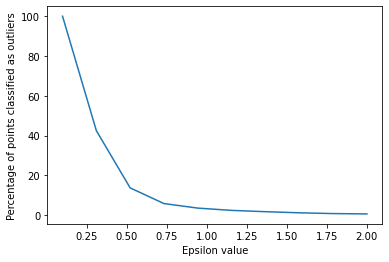

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.5, based on the plot created above, and min_samples = 8

In [98]:
eps = 0.5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_tuesday)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8)

In [99]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 array([ 2453, 13055,   206,     8,   177,     9,    21,    30,    17,
            8,    21,     6,    16,    14,    10,    13,    16,    17,
           15,    10,    15,     9,     8,    21,    13,    10,     8,
           10,     6,    13,     9,     8,     8,     8]))

In [100]:
tuesday["cluster"] = dbscan.labels_
tuesday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
537507,40.7449,-73.9888,16,57,Tuesday,0
316544,40.7487,-74.0035,7,37,Tuesday,0
438761,40.7210,-74.0006,19,15,Tuesday,0
220659,40.7461,-73.9819,16,29,Tuesday,0
72250,40.7513,-73.9904,8,53,Tuesday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Tuesdays

In [101]:
fig_tuesday_cluster = px.scatter_mapbox(
        tuesday[tuesday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_tuesday_cluster.show()

### Picking Wednesday to observe how the clustering algorithm behaves

In [102]:
wednesday.shape

(19474, 8)

In [103]:
fig_wednesday = px.scatter_mapbox(
        wednesday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_wednesday.show()

##### Dropping unnecessary columns of the dataset

In [104]:
wednesday = wednesday.drop(columns=["Year", "Month", "Day"])

In [105]:
wednesday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
320963,40.7347,-73.9988,8,7,Wednesday
552251,40.7417,-73.9975,20,35,Wednesday
208316,40.7279,-74.0056,10,47,Wednesday
216764,40.7199,-74.0003,20,48,Wednesday
321496,40.7851,-73.9732,10,5,Wednesday


##### Scaling numerical data and one-hot encoding categorical data

In [106]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(wednesday.head())
scaled_X_wednesday = preprocessor.fit_transform(wednesday)
print('...Completed.')
print(scaled_X_wednesday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes  DayOfWeek
320963  40.7347 -73.9988     8        7  Wednesday
552251  40.7417 -73.9975    20       35  Wednesday
208316  40.7279 -74.0056    10       47  Wednesday
216764  40.7199 -74.0003    20       48  Wednesday
321496  40.7851 -73.9732    10        5  Wednesday
...Completed.
[[-0.22594531 -0.4227325  -1.21379746 -1.28319539]
 [-0.02247787 -0.39634334  1.00946035  0.32817791]
 [-0.4235994  -0.56076809 -0.84325449  1.01876647]
 [-0.65613362 -0.45318153  1.00946035  1.07631552]
 [ 1.23902027  0.09693092 -0.84325449 -1.39829348]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [107]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_wednesday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_wednesday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

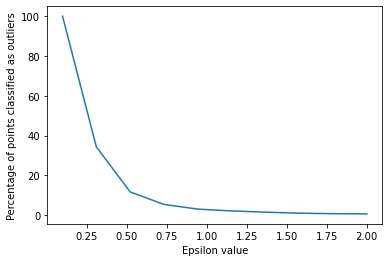

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.5, based on the plot created above, and min_samples = 8

In [109]:
eps = 0.5
min_samples = 8
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_wednesday)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8)

In [110]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([ 2516, 16025,   272,   232,    17,     6,    59,     8,    16,
            8,    35,    11,    31,    11,    30,    11,    28,    12,
            5,     8,    16,    15,    10,     9,     9,    12,    16,
           10,    10,    22,     4]))

In [111]:
wednesday["cluster"] = dbscan.labels_
wednesday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
320963,40.7347,-73.9988,8,7,Wednesday,0
552251,40.7417,-73.9975,20,35,Wednesday,0
208316,40.7279,-74.0056,10,47,Wednesday,0
216764,40.7199,-74.0003,20,48,Wednesday,0
321496,40.7851,-73.9732,10,5,Wednesday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Wednesdays

In [112]:
fig_wednesday_cluster = px.scatter_mapbox(
        wednesday[wednesday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_wednesday_cluster.show()

### Picking Thursday to observe how the clustering algorithm behaves

In [113]:
thursday.shape

(14911, 8)

In [114]:
fig_thursday = px.scatter_mapbox(
        thursday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_thursday.show()

##### Dropping unnecessary columns of the dataset

In [115]:
thursday = thursday.drop(columns=["Year", "Month", "Day"])

In [116]:
thursday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
255224,40.7514,-73.9719,18,11,Thursday
161774,40.7656,-73.9680,15,43,Thursday
2881,40.7690,-73.9632,14,32,Thursday
85655,40.7564,-73.9831,20,25,Thursday
162280,40.7246,-73.9984,16,38,Thursday


##### Scaling numerical data and one-hot encoding categorical data

In [117]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(thursday.head())
scaled_X_thursday = preprocessor.fit_transform(thursday)
print('...Completed.')
print(scaled_X_thursday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
255224  40.7514 -73.9719    18       11  Thursday
161774  40.7656 -73.9680    15       43  Thursday
2881    40.7690 -73.9632    14       32  Thursday
85655   40.7564 -73.9831    20       25  Thursday
162280  40.7246 -73.9984    16       38  Thursday
...Completed.
[[ 0.28120671  0.12638804  0.55608171 -1.06794955]
 [ 0.69120335  0.20590791  0.01309727  0.77796617]
 [ 0.78937156  0.30377852 -0.16789754  0.14343264]
 [ 0.42557172 -0.10197672  0.91807134 -0.26036142]
 [-0.49258977 -0.4139393   0.19409208  0.48954184]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [118]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_thursday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_thursday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

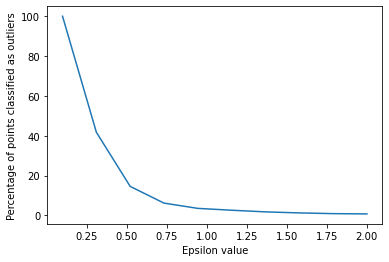

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.5, based on the plot created above, and min_samples = 8

In [120]:
eps = 0.5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_thursday)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8)

In [121]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20]),
 array([ 2366, 11869,   181,   290,     8,    10,    29,    27,    19,
           14,    11,     8,     3,     8,     8,    14,     9,     8,
           10,     7,     4,     8]))

In [122]:
thursday["cluster"] = dbscan.labels_
thursday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
255224,40.7514,-73.9719,18,11,Thursday,0
161774,40.7656,-73.9680,15,43,Thursday,0
2881,40.7690,-73.9632,14,32,Thursday,0
85655,40.7564,-73.9831,20,25,Thursday,0
162280,40.7246,-73.9984,16,38,Thursday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Thursdays

In [123]:
fig_thursday_cluster = px.scatter_mapbox(
        thursday[thursday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_thursday_cluster.show()

### Picking Friday to observe how the clustering algorithm behaves

In [124]:
friday.shape

(15883, 8)

In [125]:
fig_friday = px.scatter_mapbox(
        friday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_friday.show()

##### Dropping unnecessary columns of the dataset

In [126]:
friday = friday.drop(columns=["Year", "Month", "Day"])

In [127]:
friday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
507958,40.7451,-73.9827,17,43,Friday
88320,40.7210,-74.0038,11,27,Friday
457215,40.7702,-73.9106,3,52,Friday
409048,40.7611,-73.9852,11,7,Friday
457644,40.7294,-73.9811,7,9,Friday


##### Scaling numerical data and one-hot encoding categorical data

In [128]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(friday.head())
scaled_X_friday = preprocessor.fit_transform(friday)
print('...Completed.')
print(scaled_X_friday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
507958  40.7451 -73.9827    17       43    Friday
88320   40.7210 -74.0038    11       27    Friday
457215  40.7702 -73.9106     3       52    Friday
409048  40.7611 -73.9852    11        7    Friday
457644  40.7294 -73.9811     7        9    Friday
...Completed.
[[ 0.14733888 -0.08472943  0.34234552  0.761886  ]
 [-0.57366662 -0.5404411  -0.68874841 -0.16183953]
 [ 0.89826161  1.47246542 -2.06354032  1.2814816 ]
 [ 0.62601472 -0.13872371 -0.68874841 -1.31649643]
 [-0.3223618  -0.0501731  -1.37614437 -1.20103074]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [129]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_friday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_friday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

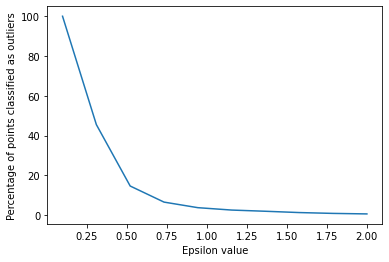

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.5, based on the plot created above, and min_samples = 8

In [131]:
eps = 0.5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_friday)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8)

In [132]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25]),
 array([ 2533, 12670,   130,    43,   157,    19,    46,    20,     8,
           42,    26,     8,    17,    33,    16,    11,     8,     8,
           24,     8,     8,    10,     8,     8,     6,     8,     8]))

In [133]:
friday["cluster"] = dbscan.labels_
friday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
507958,40.7451,-73.9827,17,43,Friday,0
88320,40.7210,-74.0038,11,27,Friday,0
457215,40.7702,-73.9106,3,52,Friday,-1
409048,40.7611,-73.9852,11,7,Friday,0
457644,40.7294,-73.9811,7,9,Friday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Fridays

In [134]:
fig_friday_cluster = px.scatter_mapbox(
        friday[friday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_friday_cluster.show()

### Picking Saturday to observe how the clustering algorithm behaves

In [135]:
saturday.shape

(13686, 8)

In [136]:
fig_saturday = px.scatter_mapbox(
        saturday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_saturday.show()

##### Dropping unnecessary columns of the dataset

In [137]:
saturday = saturday.drop(columns=["Year", "Month", "Day"])

In [138]:
saturday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
367199,40.7383,-74.0021,19,52,Saturday
237504,40.8344,-73.8166,18,42,Saturday
177399,40.7119,-74.0062,4,34,Saturday
29157,40.7658,-73.9679,15,40,Saturday
420337,40.7607,-73.9818,19,51,Saturday


##### Scaling numerical data and one-hot encoding categorical data

In [139]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(saturday.head())
scaled_X_saturday = preprocessor.fit_transform(saturday)
print('...Completed.')
print(scaled_X_saturday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
367199  40.7383 -74.0021    19       52  Saturday
237504  40.8344 -73.8166    18       42  Saturday
177399  40.7119 -74.0062     4       34  Saturday
29157   40.7658 -73.9679    15       40  Saturday
420337  40.7607 -73.9818    19       51  Saturday
...Completed.
[[ 0.04647551 -0.48510024  0.59557768  1.2989964 ]
 [ 2.57211305  3.24362677  0.44236196  0.72211615]
 [-0.64735208 -0.56751415 -1.70265806  0.26061195]
 [ 0.76921258  0.2023524  -0.01728519  0.6067401 ]
 [ 0.6351777  -0.07705087  0.59557768  1.24130837]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [140]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_saturday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_saturday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

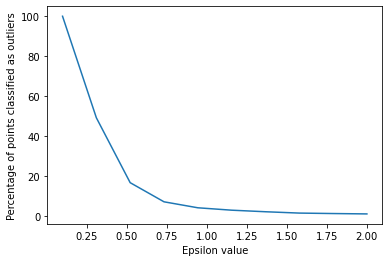

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.6, based on the plot created above, and min_samples = 8

In [142]:
eps = 0.6
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_saturday)

DBSCAN(algorithm='brute', eps=0.6, metric='manhattan', min_samples=8)

In [143]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6]),
 array([ 1567, 11965,   110,     7,     8,    12,    12,     5]))

In [144]:
saturday["cluster"] = dbscan.labels_
saturday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
367199,40.7383,-74.0021,19,52,Saturday,0
237504,40.8344,-73.8166,18,42,Saturday,-1
177399,40.7119,-74.0062,4,34,Saturday,0
29157,40.7658,-73.9679,15,40,Saturday,0
420337,40.7607,-73.9818,19,51,Saturday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Saturdays

In [145]:
fig_saturday_cluster = px.scatter_mapbox(
        saturday[saturday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_saturday_cluster.show()

## Hot zones per day of week in New York City

## Showing clusters per hour for Sunday

In [146]:
sunday_sort = sunday.sort_values(by=["Hour"])

In [147]:
fig_sunday_cluster = px.scatter_mapbox(
    sunday_sort[sunday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_sunday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Sunday"
      )
img_name = "Traffic by hour on Sunday"
fig_sunday_cluster.write_html(img_name)
fig_sunday_cluster.show()

### Showing clusters per hour for Monday

In [148]:
monday_sort = monday.sort_values(by=["Hour"])
fig_monday_cluster = px.scatter_mapbox(
    monday_sort[monday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_monday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Monday"
      )
img_name = "Traffic by hour on Monday"
fig_monday_cluster.write_html(img_name)
fig_monday_cluster.show()

### Showing clusters per hour for Tuesday

In [149]:
tuesday_sort = tuesday.sort_values(by=["Hour"])
fig_tuesday_cluster = px.scatter_mapbox(
    tuesday_sort[tuesday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_tuesday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Tuesday"
      )
img_name = "Traffic by hour on Tuesday"
fig_tuesday_cluster.write_html(img_name)
fig_tuesday_cluster.show()

### Showing clusters per hour for Wednesday

In [150]:
wednesday_sort = wednesday.sort_values(by=["Hour"])
fig_wednesday_cluster = px.scatter_mapbox(
    wednesday_sort[wednesday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_wednesday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Wednesday"
      )
img_name = "Traffic by hour on Wednesday"
fig_wednesday_cluster.write_html(img_name)
fig_wednesday_cluster.show()

### Showing clusters per hour for Thursday

In [151]:
thursday_sort = thursday.sort_values(by=["Hour"])
fig_thursday_cluster = px.scatter_mapbox(
    thursday_sort[thursday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_thursday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Thursday"
      )
img_name = "Traffic by hour on Thursday"
fig_thursday_cluster.write_html(img_name)
fig_thursday_cluster.show()

### Showing clusters per hour for Friday

In [152]:
friday_sort = friday.sort_values(by=["Hour"])
fig_friday_cluster = px.scatter_mapbox(
    friday_sort[friday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_friday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Friday"
      )
img_name = "Traffic by hour on Friday"
fig_friday_cluster.write_html(img_name)
fig_friday_cluster.show()

### Showing clusters per hour for Saturday

In [153]:
saturday_sort = saturday.sort_values(by=["Hour"])
fig_saturday_cluster = px.scatter_mapbox(
    saturday_sort[saturday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_saturday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Saturday"
      )
img_name = "Traffic by hour on Saturday"
fig_saturday_cluster.write_html(img_name)
fig_saturday_cluster.show()

### Picking Sunday to observe how the K-means clustering algorithm behaves

In [154]:
sunday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
311452,40.7473,-73.9722,9,45,Sunday,0
188045,40.7396,-73.9927,13,23,Sunday,0
371454,40.7381,-74.0094,2,50,Sunday,0
287702,40.7244,-73.9998,16,56,Sunday,0
556733,40.7638,-73.9756,21,43,Sunday,0


In [160]:
sunday = sunday.drop("DayOfWeek", axis = 1)
sunday = sunday.drop("cluster",  axis = 1)

##### Scaling numerical data and one-hot encoding categorical data

In [161]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
# StandardScaler will substract mean and divide by standard deviation to each observation
sc = StandardScaler()

# Apply StandardScaler to X
X = sc.fit_transform(sunday)

# Visualize first five rows 
# Standard scaler transform X as numpy array. Therefore you can't use .head()
X[:5]

array([[ 0.3429522 , -0.02960783, -0.43520565,  0.9268784 ],
       [ 0.1552193 , -0.35556205,  0.142177  , -0.33653042],
       [ 0.11864796, -0.62109549, -1.44562528,  1.21401677],
       [-0.21537033, -0.46845351,  0.57521398,  1.55858281],
       [ 0.74523699, -0.08366853,  1.29694229,  0.81202306]])

##### Determining how many clusters we should have using the Elbow method

In [162]:
from sklearn.cluster import KMeans
# Creating a loop that will collect the Within-sum-of-square (wcss) for each value of K 
# Use .inertia_ parameter to get the within sum of square value for each value of K 
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 35676.00000000011
WCSS for K=2 --> 28824.984443237496
WCSS for K=3 --> 22922.526768285974
WCSS for K=4 --> 18210.955711592374
WCSS for K=5 --> 15972.026891072312
WCSS for K=6 --> 14431.770538903847
WCSS for K=7 --> 13107.224935884513
WCSS for K=8 --> 11824.19503239547
WCSS for K=9 --> 11116.812897787255
WCSS for K=10 --> 10458.981824730907


##### Visualizing inertia as a function of K using plotly

In [163]:
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe")

##### It can be seen above that after K=4, inertia is not decreasing a lot.

##### Double-checking with the Silhouette method

In [164]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.22472478661847733
Silhouette score for K=3 is 0.27275670635856847
Silhouette score for K=4 is 0.2906977879558777
Silhouette score for K=5 is 0.2795408091470601
Silhouette score for K=6 is 0.2702052798112637
Silhouette score for K=7 is 0.27581800165990533
Silhouette score for K=8 is 0.29258957553821124
Silhouette score for K=9 is 0.2732481992309657
Silhouette score for K=10 is 0.25889897108569354


##### Visualizing inertia as a function of K using plotly

In [165]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

##### The Silhouette method also suggests that K=4 is appropriate

In [166]:
# Import K-Means 
from sklearn.cluster import KMeans

# Instanciate KMeans with k=3 and initialisation with k-means++
# You should always use k-means++ as it alleviate the problem of local minimum convergence 
kmeans = KMeans(n_clusters=4, init = "k-means++", random_state=0)

# Fit kmeans to our dataset
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

##### Checking the coordinates of each cluster centers

<AxesSubplot:>

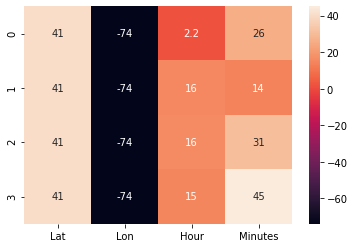

In [167]:
# Cluster centers coordinates
# Let's use inverse transform to have the real coordinates 
cluster_centers = sc.inverse_transform(kmeans.cluster_centers_)

# Let's get column names to facilita understanding 
labels = sunday.columns

# Let's visualize on a heatmap 
## Import Seaborn and pandas 
import seaborn as sns
import pandas as pd 

# Create a heatmap 
sns.heatmap(pd.DataFrame(cluster_centers, columns=labels),  annot=True)

In [168]:
## Create data using numpy 
import numpy as np 
point_1 = np.array([[40.7436, -73.9537, 0, 15]])
point_2 = np.array([[40.6994, -73.9471, 8, 44]])
point_3 = np.array([[40.7341, -74.0081, 5, 13]])
point_4 = np.array([[40.7472, -73.9776, 14, 59]])
point_5 = np.array([[40.7669, -73.9791, 11, 48]])

## Apply standard scaler 
point_1 = sc.transform(point_1)
point_2 = sc.transform(point_2)
point_3 = sc.transform(point_3)
point_4 = sc.transform(point_4)
point_5 = sc.transform(point_5)


## Get cluster 
predict_point_1 = kmeans.predict(point_1)
predict_point_2 = kmeans.predict(point_2)
predict_point_3 = kmeans.predict(point_3)
predict_point_4 = kmeans.predict(point_4)
predict_point_5 = kmeans.predict(point_5)

print("Point 1 belongs to cluster: {}".format(predict_point_1[0]))
print("Point 2 belongs to cluster: {}".format(predict_point_2[0]))
print("Point 3 belongs to cluster: {}".format(predict_point_3[0]))
print("Point 4 belongs to cluster: {}".format(predict_point_4[0]))
print("Point 5 belongs to cluster: {}".format(predict_point_5[0]))

Point 1 belongs to cluster: 0
Point 2 belongs to cluster: 3
Point 3 belongs to cluster: 0
Point 4 belongs to cluster: 3
Point 5 belongs to cluster: 3


##### Conclusion : As far as my knowledge goes in  this domain, K-means algorithm does not seem appropriate to solve this clustering problem